In [18]:
from glob import glob
from tqdm import tqdm
from PIL import Image
import json
import requests
from io import BytesIO
import base64

In [2]:
!du -hs data/*

24G	data/generated
479M	data/generated-old
18M	data/source


In [20]:
files = glob('data/generated/*')
len(files)

593

In [5]:
with open('google-image.jsonl', 'w') as fopen_l:
    images = set()
    for f in tqdm(files):
        with open(f) as fopen:
            for l in fopen:
                try:
                    l = json.loads(l)
                    if l['parent_href'] and l['image_base64'] not in images:
                        fopen_l.write(f'{json.dumps(l)}\n')
                        images.add(l['image_base64'])
                except:
                    pass

100%|██████████| 593/593 [51:47<00:00,  5.24s/it]  


In [6]:
!ls -lh google-image.jsonl

-rw-r--r-- 1 ubuntu ubuntu 15G Mar 12 05:37 google-image.jsonl


In [7]:
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj='google-image.jsonl',
    path_in_repo='google-image.jsonl',
    repo_id='malaysia-ai/crawl-google-image',
    repo_type='dataset',
)

google-image.jsonl:   0%|          | 0.00/15.2G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/malaysia-ai/crawl-google-image/commit/74ee222091e14feb178542e563e7dd7fbd966055', commit_message='Upload google-image.jsonl with huggingface_hub', commit_description='', oid='74ee222091e14feb178542e563e7dd7fbd966055', pr_url=None, pr_revision=None, pr_num=None)

In [8]:
!wc -l google-image.jsonl

1234785 google-image.jsonl


In [33]:
data = []
with open('google-image.jsonl') as fopen:
    for l in fopen:
        l = json.loads(l)
        data.append(l)
        if len(data) >= 10:
            break

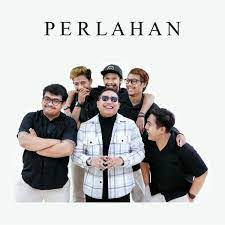

In [14]:
Image.open(BytesIO(base64.b64decode(l['image_base64'][23:])))

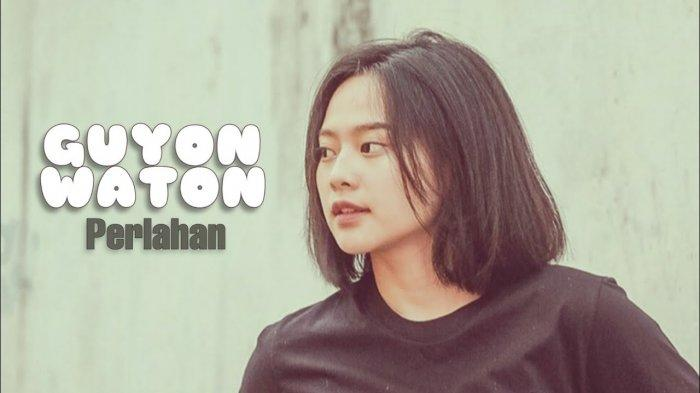

In [41]:
r = requests.get(l['parent_href'])
url = r.content.decode().split('Please click')[1].split('imgurl=')[1].split('&amp;')[0]
Image.open(requests.get(url, stream=True).raw)